# Download Dataset


First, we download the `PlantVillage` dataset from Google Drive by using the unique `id` it holds and unzip the downloaded **PlantVillage.zip** into the **PlantVillage** dataset folder.

In [1]:
# Download a file based on its file ID.
file_id = '18DbC6Xj4NP-hLzI14WuMaAEyq482vNfn'

# Download dataset
!gdown https://drive.google.com/uc?id={file_id}

# Unzip the downloaded file
!unzip -q PlantVillage.zip

Downloading...
From: https://drive.google.com/uc?id=18DbC6Xj4NP-hLzI14WuMaAEyq482vNfn
To: /content/PlantVillage.zip
866MB [00:11, 73.5MB/s]


Import libraries

In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as Imgen
from keras.models import Model,Sequential
from keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense,GlobalAveragePooling2D,BatchNormalization
from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input

from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

Import dataset 


In [5]:
import os
data_dir = " /content/PlantVillage"
train_dir = "/content/PlantVillage/train"
valid_dir = data_dir + "/val"
diseases = os.listdir(train_dir)

In [6]:
# printing the disease names
print(diseases)

['Tomato___Bacterial_spot', 'Pepper,_bell___healthy', 'Corn_(maize)___Common_rust_', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Squash___Powdery_mildew', 'Apple___Black_rot', 'background', 'Raspberry___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___healthy', 'Grape___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Septoria_leaf_spot', 'Strawberry___healthy', 'Apple___Apple_scab', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Leaf_Mold', 'Apple___Cedar_apple_rust', 'Potato___Late_blight', 'Peach___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Pepper,_bell___Bacterial_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Grape___Esca_(Black_Measles)', 'Tomato___Target_Spot', 'Blueberry___healthy', 'Peach___Bacterial_spot', 'Grape___Black_rot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Potato___healthy', 'Potato___Early_blight', 'Toma

In [7]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 39


In [9]:
import pandas as pd
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Tomato___Bacterial_spot,1702
"Pepper,_bell___healthy",1183
Corn_(maize)___Common_rust_,953
Cherry_(including_sour)___healthy,684
Corn_(maize)___Northern_Leaf_Blight,788
Squash___Powdery_mildew,1468
Apple___Black_rot,496
background,572
Raspberry___healthy,297
Tomato___Tomato_Yellow_Leaf_Curl_Virus,4286


Text(0.5, 1.0, 'Images per each class of plant disease')

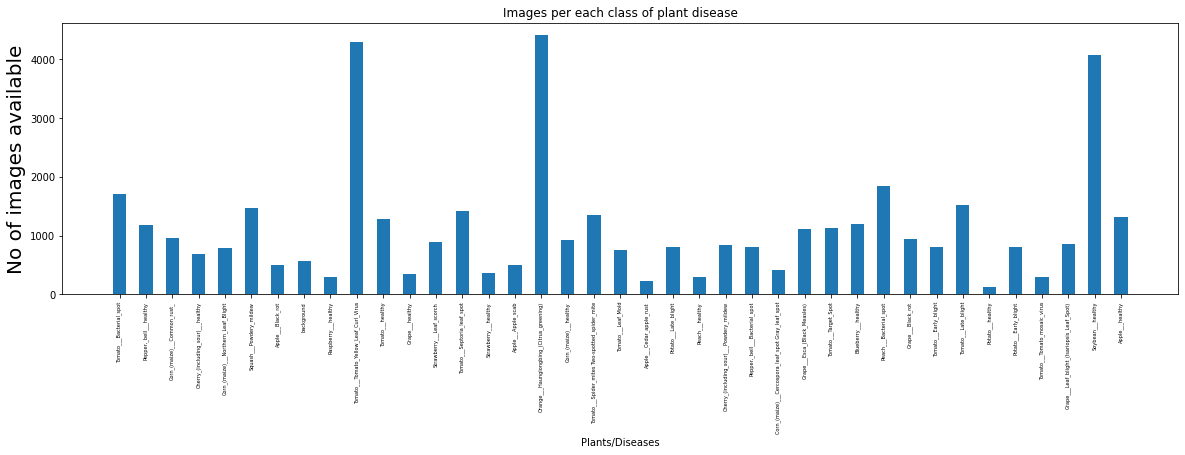

In [10]:
# plotting number of images available for each disease
index = [n for n in range(39)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.5)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=20)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [11]:
traingen = Imgen(preprocessing_function=preprocess_input,
                
                shear_range = 0.2,
                zoom_range = 0.2,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                fill_mode="nearest",
                validation_split=0.15)


testgen = Imgen(preprocessing_function=preprocess_input)

In [12]:
trainds = traingen.flow_from_directory("/content/PlantVillage/train",
                                      target_size=(150,150),
                                       class_mode="categorical",
                                       seed=123,
                                       batch_size=32,
                                       subset="training"
                                      )
valds = traingen.flow_from_directory("/content/PlantVillage/val",
                                      target_size=(150,150),
                                       class_mode="categorical",
                                       seed=123,
                                       batch_size=32,
                                   subset="validation"
                                      )


Found 37430 images belonging to 39 classes.
Found 1634 images belonging to 39 classes.


In [13]:
c = trainds.class_indices
classes = list(c.keys())
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [14]:
x,y = next(trainds)

# function to plot images
def plotImages(x,y):
    plt.figure(figsize=[15,11])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(classes[np.argmax(y[i])])
        plt.axis("off")
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

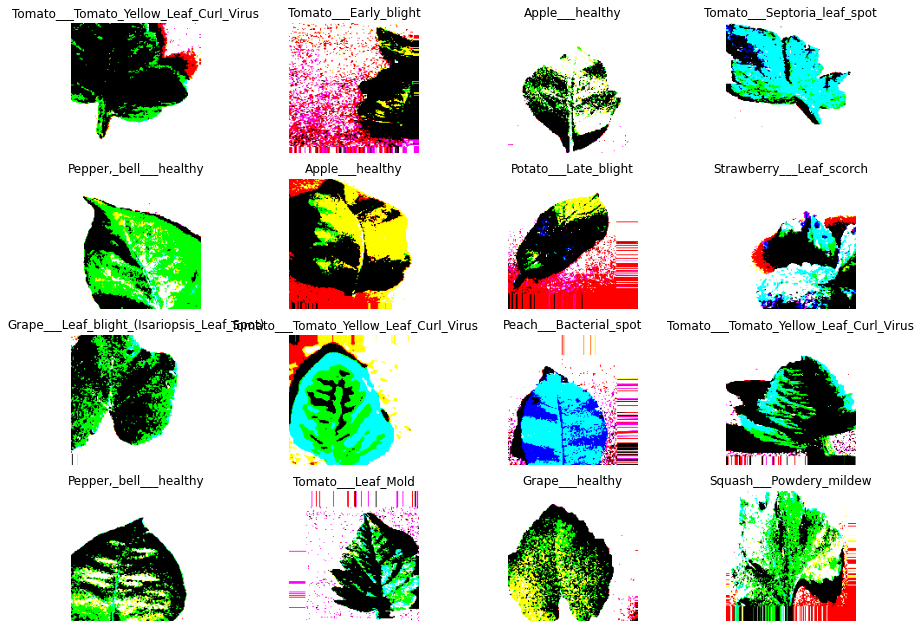

In [15]:
plotImages(x,y)

In [16]:
base_model = ResNet50(include_top=False,
                     input_shape=(150,150,3),
                      weights = "imagenet",
                      pooling="avg"
                     )
base_model.trainable = False

94781440/94765736 [==============================] - 1s 0us/step


In [17]:
image_input = Input(shape=(150,150,3))

x = base_model(image_input,training = False)

x = Dense(512,activation = "relu")(x)

x = Dropout(0.3)(x)

x = Dense(128,activation = "relu")(x)

image_output = Dense(39,activation="softmax")(x)

model = Model(image_input,image_output)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 39)                5031      
Total params: 24,707,495
Trainable params: 1,119,783
Non-trainable params: 23,587,712
_________________________________________

In [19]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [20]:
my_calls = [EarlyStopping(monitor="val_accuracy",patience=3),
            ModelCheckpoint("Model.h5",verbose= 1 ,save_best_only=True)]

In [21]:
hist = model.fit(trainds,epochs=1,validation_data=valds,callbacks=my_calls)

1170/1170 [==============================] - 296s 225ms/step - loss: 0.6083 - accuracy: 0.8170 - val_loss: 0.2962 - val_accuracy: 0.9002

Epoch 00001: val_loss improved from inf to 0.29622, saving model to Model.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


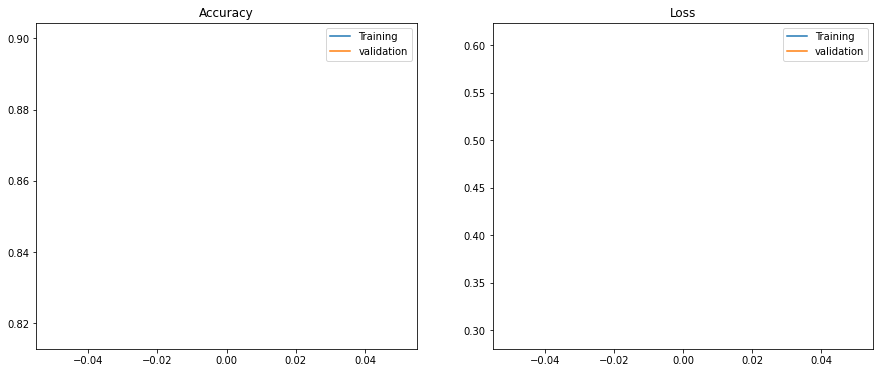

In [23]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

In [24]:
print("[INFO] Calculating model accuracy")
  
scores = model.evaluate(  trainds  )
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
1170/1170 [==============================] - 251s 214ms/step - loss: 0.2794 - accuracy: 0.9049
Test Accuracy: 90.48891067504883


In [35]:

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array


In [50]:
list(trainds.class_indices.values())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38]

In [53]:
ref=dict(zip(list(trainds.class_indices.values()), classes))
print(ref)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

In [56]:
def predection (path):
  img=load_img(path, target_size=(150,150))
  i=img_to_array(img)
  im=preprocess_input(i)
  img=np.expand_dims(im,axis=0)
  pred=np.argmax(model.predict(img))
  plt.imshow(plt.imread(path))
  print(f"The image belongs to {ref[pred]} ")

The image belongs to Apple___Cedar_apple_rust 


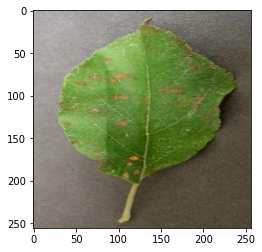

In [57]:
path="/content/PlantVillage/val/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG"
predection(path)

The image belongs to Strawberry___Leaf_scorch 


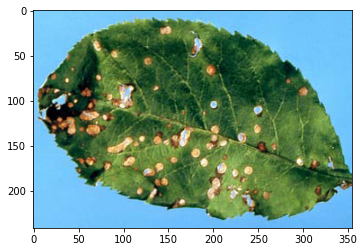

In [59]:
path="/content/PlantVillage/test_img/apple_test_1.png"
predection(path)

The image belongs to Grape___Black_rot 


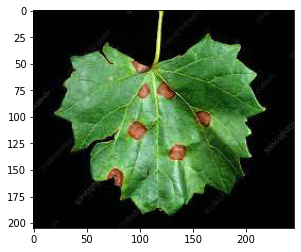

In [60]:
path="/content/PlantVillage/test_img/grape_test_1.jpg"
predection(path)

The image belongs to Potato___Late_blight 


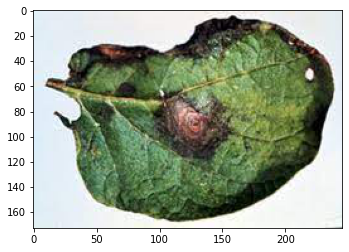

In [61]:
path="/content/PlantVillage/test_img/patato_test_1.jpg"
predection(path)